In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import sqlite3

In [2]:
tree = pd.read_csv("covtype.csv")

In [3]:
tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
tree.shape

(581012, 55)

In [5]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
tree.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
for col in tree.columns:
    print("column", col, "has", tree[col].nunique(), "unique values")

column Elevation has 1978 unique values
column Aspect has 361 unique values
column Slope has 67 unique values
column Horizontal_Distance_To_Hydrology has 551 unique values
column Vertical_Distance_To_Hydrology has 700 unique values
column Horizontal_Distance_To_Roadways has 5785 unique values
column Hillshade_9am has 207 unique values
column Hillshade_Noon has 185 unique values
column Hillshade_3pm has 255 unique values
column Horizontal_Distance_To_Fire_Points has 5827 unique values
column Wilderness_Area1 has 2 unique values
column Wilderness_Area2 has 2 unique values
column Wilderness_Area3 has 2 unique values
column Wilderness_Area4 has 2 unique values
column Soil_Type1 has 2 unique values
column Soil_Type2 has 2 unique values
column Soil_Type3 has 2 unique values
column Soil_Type4 has 2 unique values
column Soil_Type5 has 2 unique values
column Soil_Type6 has 2 unique values
column Soil_Type7 has 2 unique values
column Soil_Type8 has 2 unique values
column Soil_Type9 has 2 unique 

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

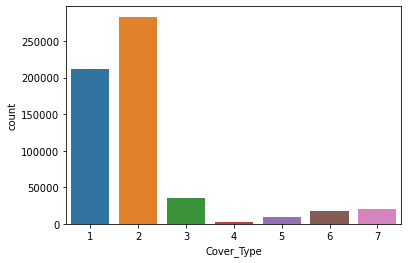

In [8]:
sns.countplot(tree["Cover_Type"])

In [9]:
tree.isnull().sum()*100/tree.shape[0]

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Type10                       

In [10]:
numeric = []

for col in tree.columns:
    if tree[col].nunique() > 7:
        numeric.append(col)

In [11]:
numeric

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [12]:
def outlier_zscore(df, col, min_z=1, max_z=5, step=0.1, print_list=False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ["threshold", "outlier_count"])
        df_outlier["pct"] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_threshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0], 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_threshold, 0, df_outlier.outlier_count.max(),
              colors="r", ls=":")
    plt.annotate("Zscore: {}\nValue: {}\nPercentile: {}".format(best_threshold, outlier_limit,
                                                               (np.round(percentile_threshold, 3),
                                                               np.round(100-percentile_threshold, 3))),
                (best_threshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_threshold, outlier_limit, percentile)

In [13]:
def outlier_inspect(df, col, min_z=1, max_z=5, step=0.5, max_hist=None, bins=50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1, 3, 1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins=50)
    else:
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins=50)
    plt.subplot(1, 3, 2)
    sns.boxplot(df[col])
    plt.subplot(1, 3, 3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z=max_z, step=step)
    plt.show()

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


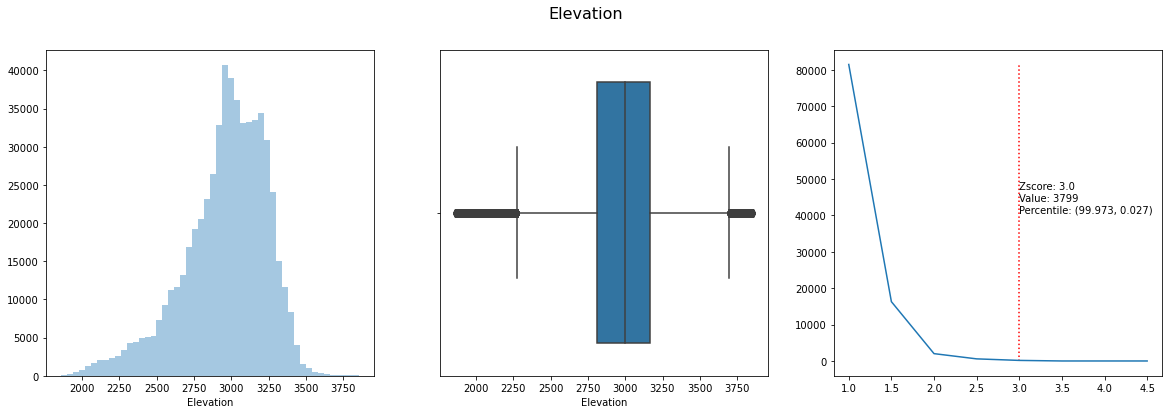

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


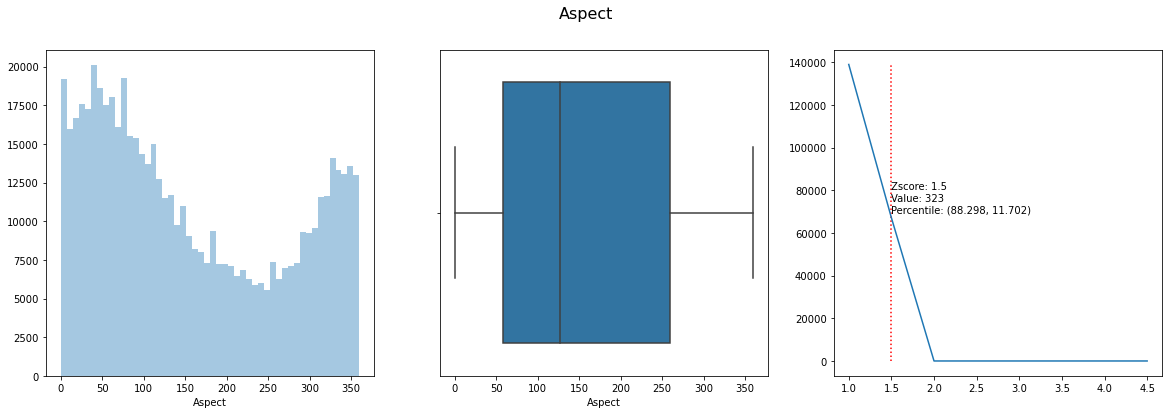

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


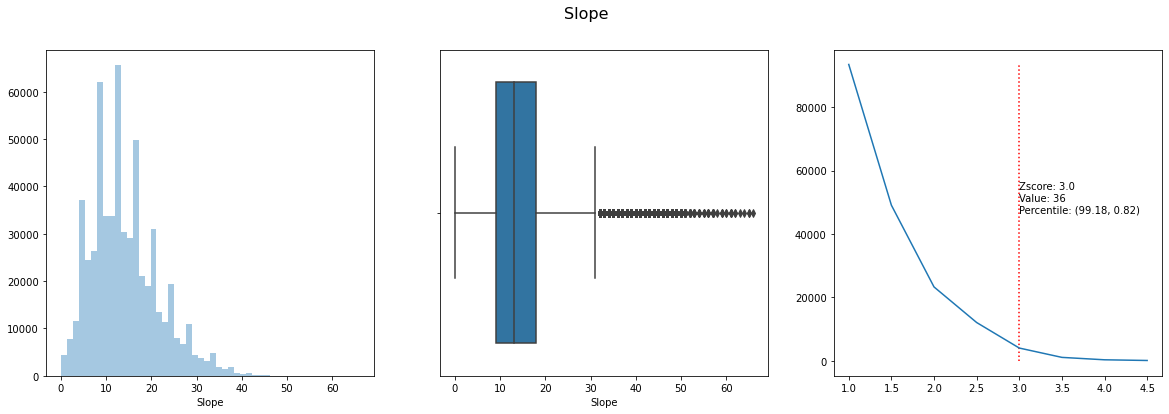

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


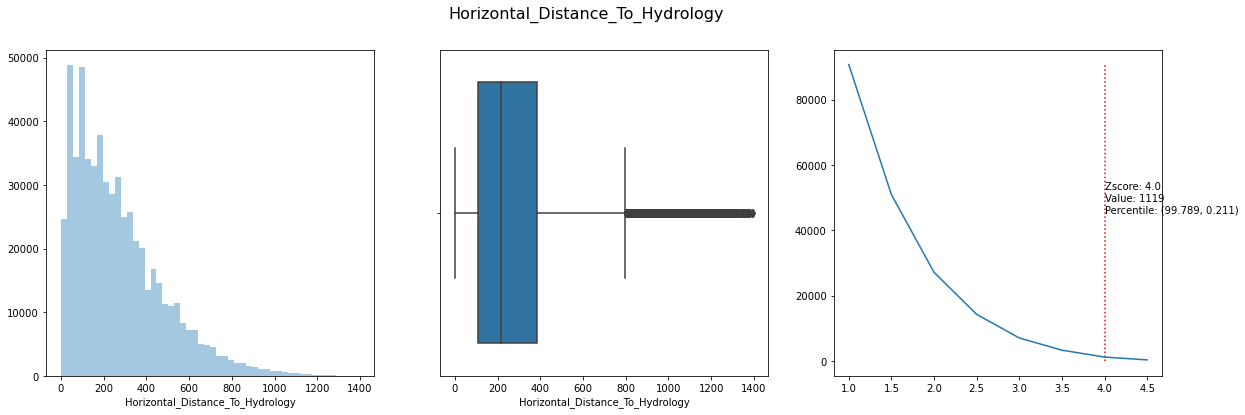

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


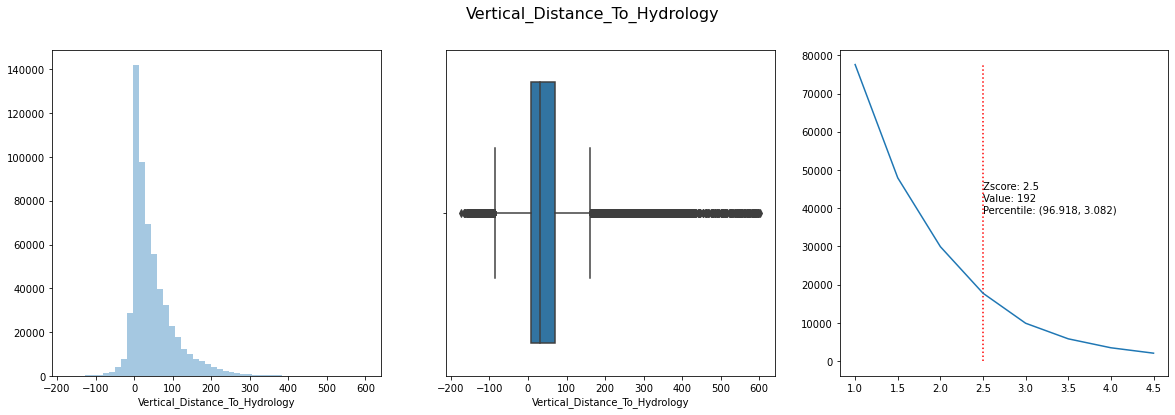

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


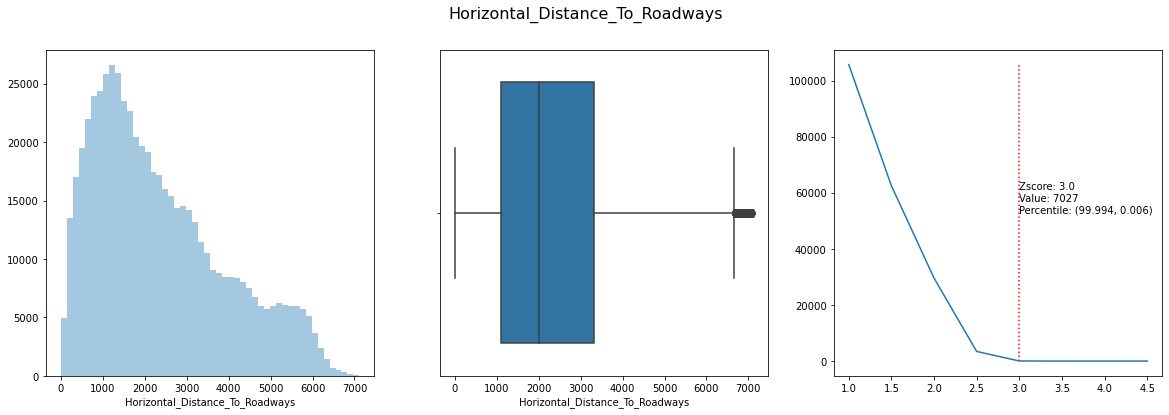

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


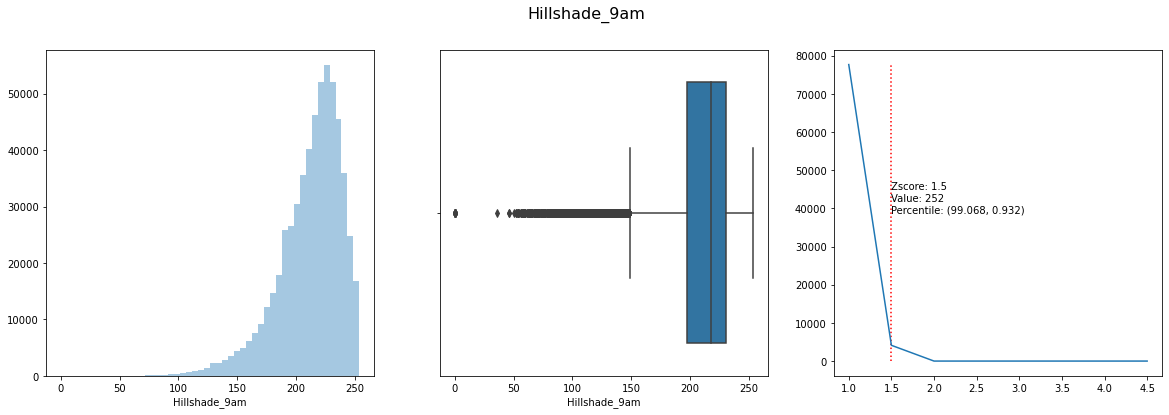

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


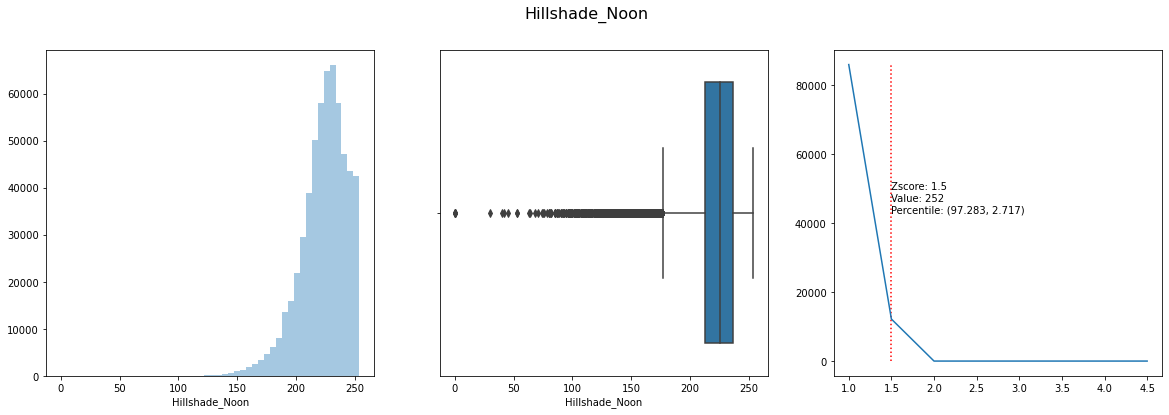

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


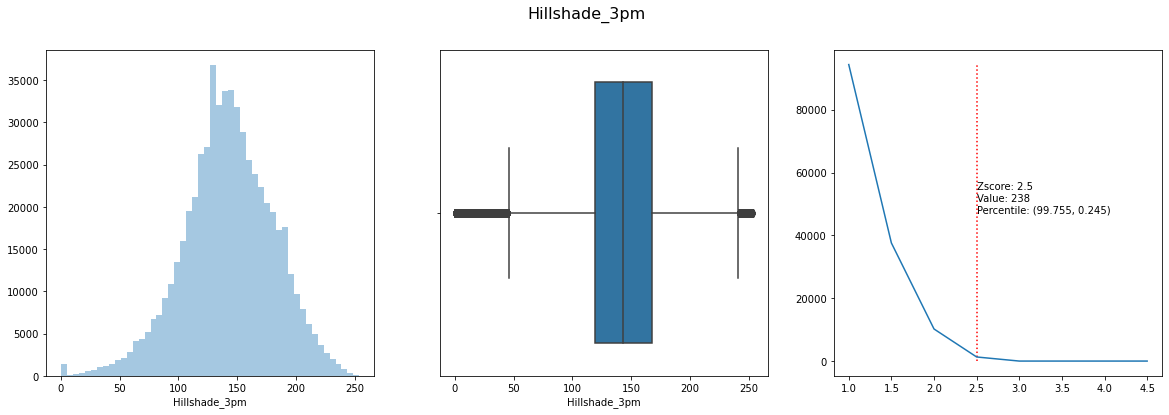

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


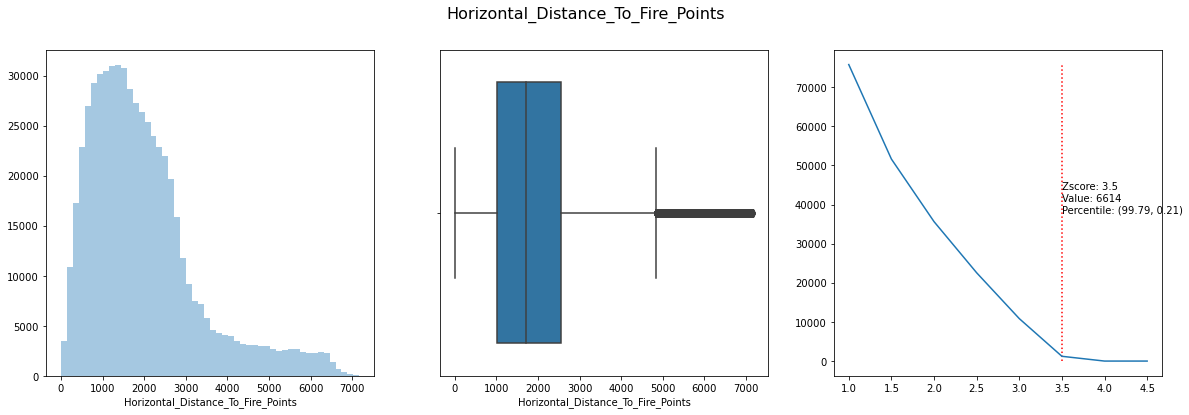

In [14]:
for col in numeric:
    outlier_inspect(tree, col)

In [15]:
def detect_outliers(df, col_name):
    """
    This function detects outliers based on 3 time IQR and returns the number of
    lower and upper limit and number of outliers respectively
    """
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    
    upper_limit = third_quartile + (3 * IQR)
    lower_limit = first_quartile - (3 * IQR)
    outlier_count = 0
    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count += 1
    return lower_limit, upper_limit, outlier_count

In [16]:
for col in numeric:
    if detect_outliers(tree, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(tree, col)[2], col))

There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points


In [17]:
tree1 = tree[(tree["Slope"] > detect_outliers(tree, "Slope")[0]) &
            (tree["Slope"] < detect_outliers(tree, "Slope")[1])]

In [18]:
tree1.shape

(580640, 55)

In [19]:
tree1 = tree1[(tree1["Horizontal_Distance_To_Fire_Points"] > detect_outliers(tree1, "Horizontal_Distance_To_Fire_Points")[0]) &
            (tree1["Horizontal_Distance_To_Fire_Points"] < detect_outliers(tree1, "Horizontal_Distance_To_Fire_Points")[1])]

In [20]:
tree1.shape

(580630, 55)

In [21]:
tree1 = tree1[(tree1["Horizontal_Distance_To_Hydrology"] > detect_outliers(tree1, "Horizontal_Distance_To_Hydrology")[0]) &
            (tree1["Horizontal_Distance_To_Hydrology"] < detect_outliers(tree1, "Horizontal_Distance_To_Hydrology")[1])]

In [22]:
tree1 = tree1[(tree1["Vertical_Distance_To_Hydrology"] > detect_outliers(tree1, "Vertical_Distance_To_Hydrology")[0]) &
            (tree1["Vertical_Distance_To_Hydrology"] < detect_outliers(tree1, "Vertical_Distance_To_Hydrology")[1])]

In [23]:
tree1.shape

(574967, 55)

In [24]:
len(tree) - len(tree1)

6045

In [25]:
tree1 = tree1.reset_index(drop = True)

In [26]:
tree1.shape

(574967, 55)

In [27]:
for i in range(1, 8):
    print("the shape of the value of", i, tree1[tree1["Cover_Type"] == i].shape)

the shape of the value of 1 (210004, 55)
the shape of the value of 2 (280193, 55)
the shape of the value of 3 (35546, 55)
the shape of the value of 4 (2741, 55)
the shape of the value of 5 (9453, 55)
the shape of the value of 6 (17345, 55)
the shape of the value of 7 (19685, 55)


<AxesSubplot:xlabel='Cover_Type', ylabel='Size'>

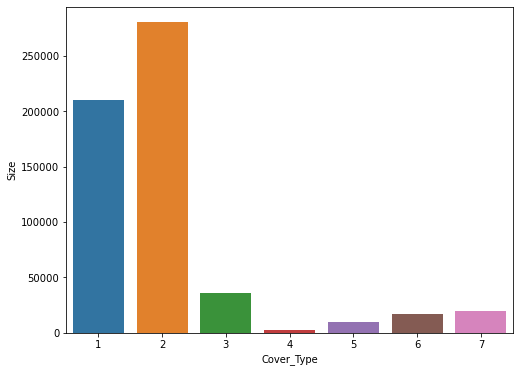

In [28]:
class_tree = tree1.groupby("Cover_Type").size()
class_label = pd.DataFrame(class_tree, columns=["Size"])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index, y="Size", data=class_label)

In [29]:
# As we can see from the graph above, the dataset is highly imbalanced.

In [30]:
for i, number in enumerate(class_tree):
    percent = (number / class_tree.sum())
    print("Cover_Type", class_tree.index[i])
    print("%.2f"% percent)

Cover_Type 1
0.37
Cover_Type 2
0.49
Cover_Type 3
0.06
Cover_Type 4
0.00
Cover_Type 5
0.02
Cover_Type 6
0.03
Cover_Type 7
0.03


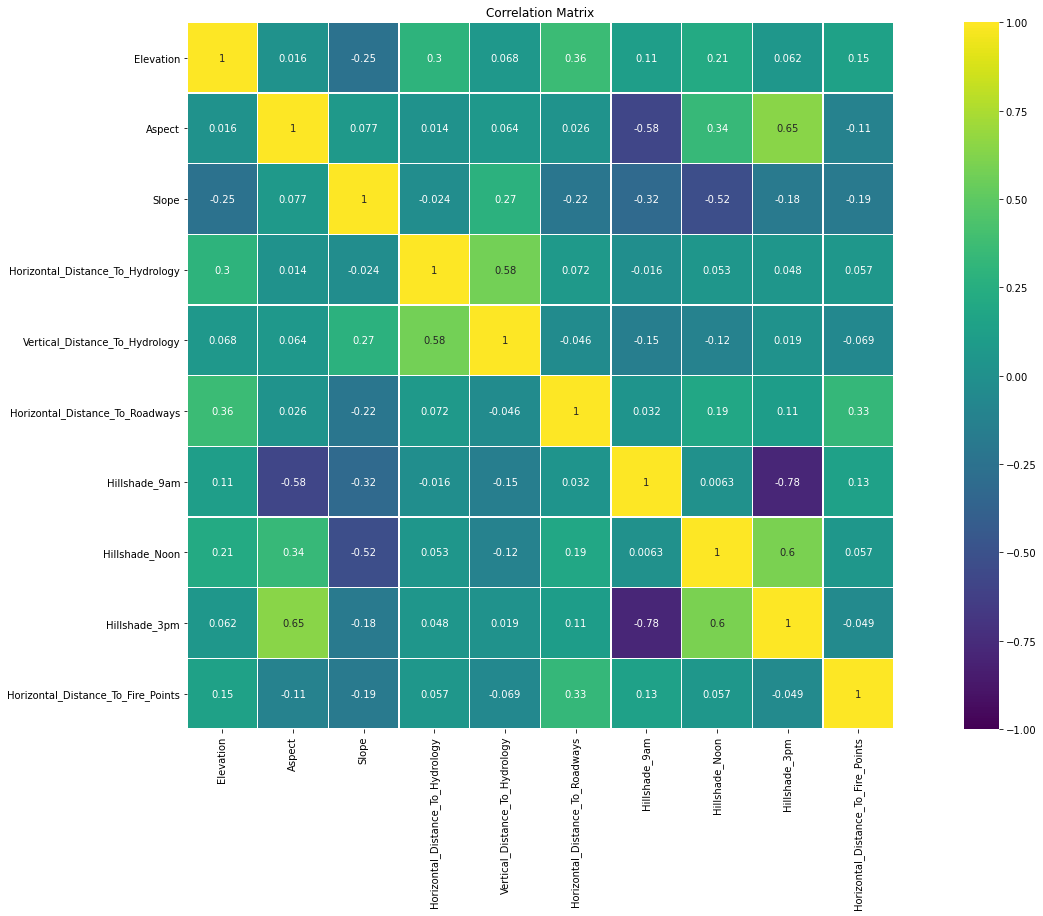

In [31]:
corr_matrix = tree1[numeric].corr()

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidth=.5, vmin=-1, vmax=1, cmap="viridis")
plt.title("Correlation Matrix")

plt.show()

In [32]:
tree1.to_csv("covtype_EDA.csv", index=False)

In [34]:
# Creation of the connection and importing dataframe into database.

with sqlite3.connect("tree_database.db") as cnnct:
    tree1.to_sql("covtype2", cnnct, if_exists="replace")